<p style = "font-size : 50px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #bedcfa; border-radius: 5px 5px;"><strong>Chronic Kidney Disease Prediction</strong></p>

<img style="margin-left: 10%; float: center;  border:5px solid #ffb037; width:80%; height : 80%;" src = https://medicaldialogues.in/h-upload/2020/12/30/145030-chronic-kidney-disease.jpg> 

In [1]:
# imports library 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [2]:
# Membaca file CSV 

df = pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.shape

(400, 26)

In [4]:
# Menghapus kolom id
df.drop('id', axis = 1, inplace = True)

In [5]:
# rename column names to make it more user-friendly

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'anemia', 'class']

In [6]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Seperti yang dapat kita lihat, kolom 'packed_cell_volume', 'white_blood_cell_count', dan 'red_blood_cell_count' bertipe objek. Kita perlu mengubahnya menjadi tipe data numerik.</strong></p> 

In [9]:
# Mengubah kolom ke data numerik

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [11]:
# Mengklasifikasikan kolom: kolom kategorikal dan kolom numerik

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [12]:
# Melihat nilai spesifik pada kolom kategorikal

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

anemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Terdapat beberapa ambiguitas pada kolom-kolom yang ada, dan kita harus menghapusnya.</strong></p> 

In [13]:
# Mengganti nilai yang tidak standar

df['diabetes_mellitus'] = df['diabetes_mellitus'].replace({'\tno':'no','\tyes':'yes',' yes':'yes'})

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [14]:
# Mengonversi kolom 'class' ke bentuk numerik biner (0 dan 1)

df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [15]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



#### Melihat Outliers

In [16]:
#Membuat function untuk mendeteksi outliers
def detect_outliers(data, col):
    #Menghitung  interquartile range (IQR)
    q1, q3 = np.percentile(data[col], [25, 75])
    iqr = q3 - q1

    #Menghitung batas atas dan bawah
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr

    #detect outliers
    outliers = data[(data[col] > upper_bound) | (data[col] < lower_bound)]

    return outliers

In [17]:
columns = [
    'age',
    'blood_pressure',
    'specific_gravity',
    'albumin',
    'sugar',
    'blood_glucose_random',
    'blood_urea',
    'serum_creatinine',
    'sodium',
    'potassium',
    'hemoglobin',
    'packed_cell_volume',
    'white_blood_cell_count',
    'red_blood_cell_count'
]


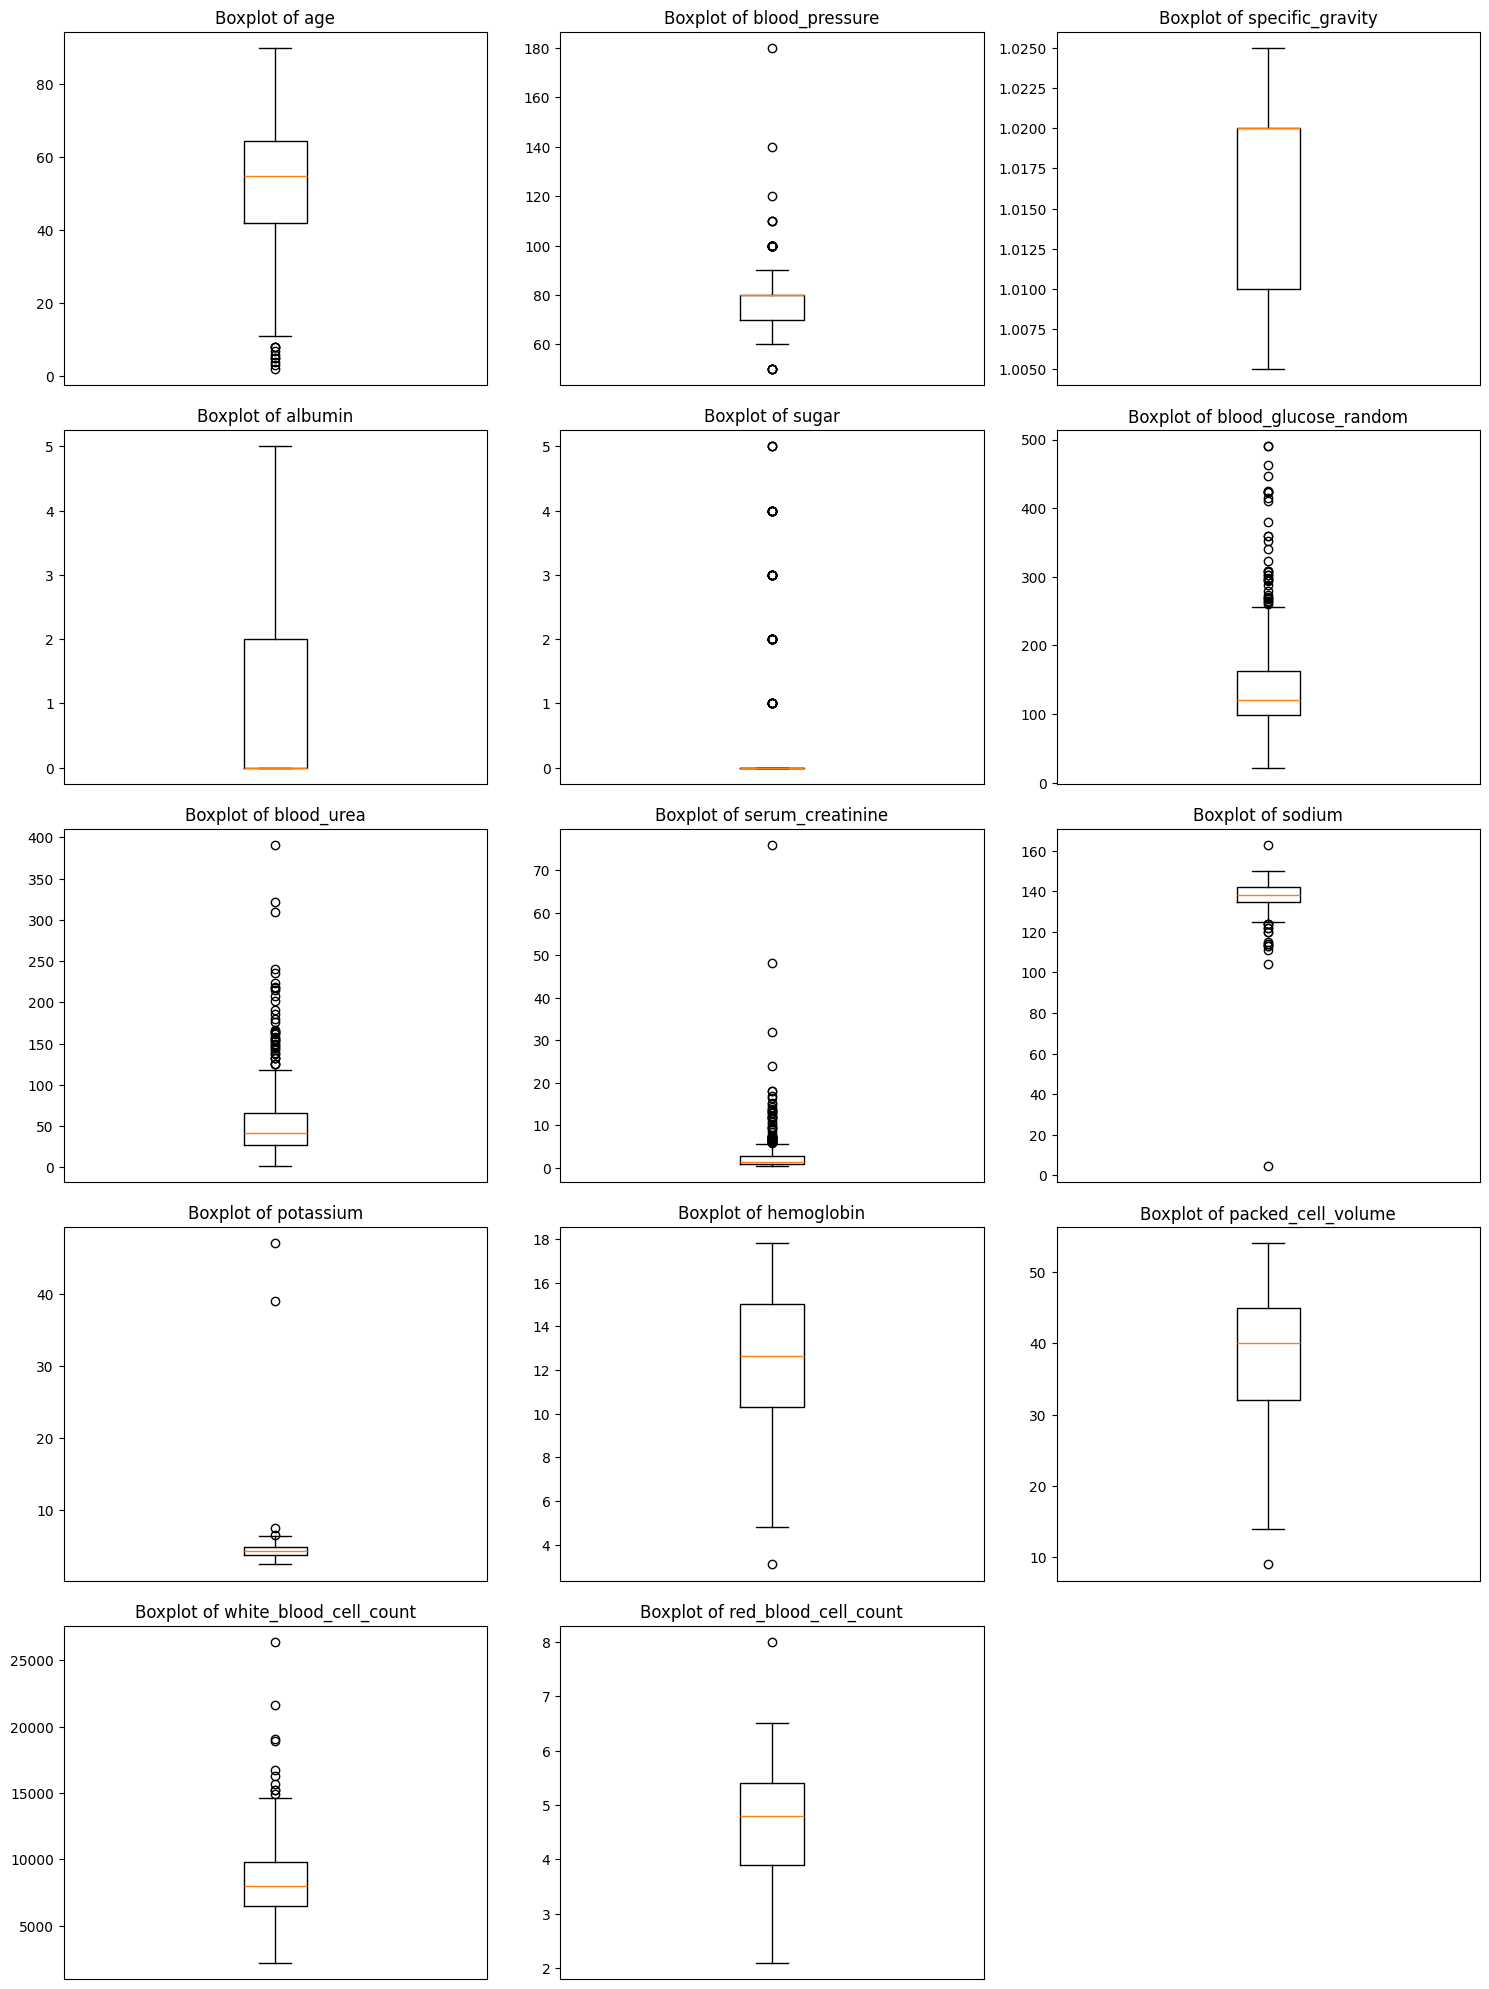

In [18]:
# Buat subplots dalam grid layout
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

# Buat boxplot untuk setiap fitur
for i, col in enumerate(columns):
    outliers = detect_outliers(df, col)
    axes[i].boxplot(df[col].dropna())
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xticks([])

# Sembunyikan subplot kosong (jika ada)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

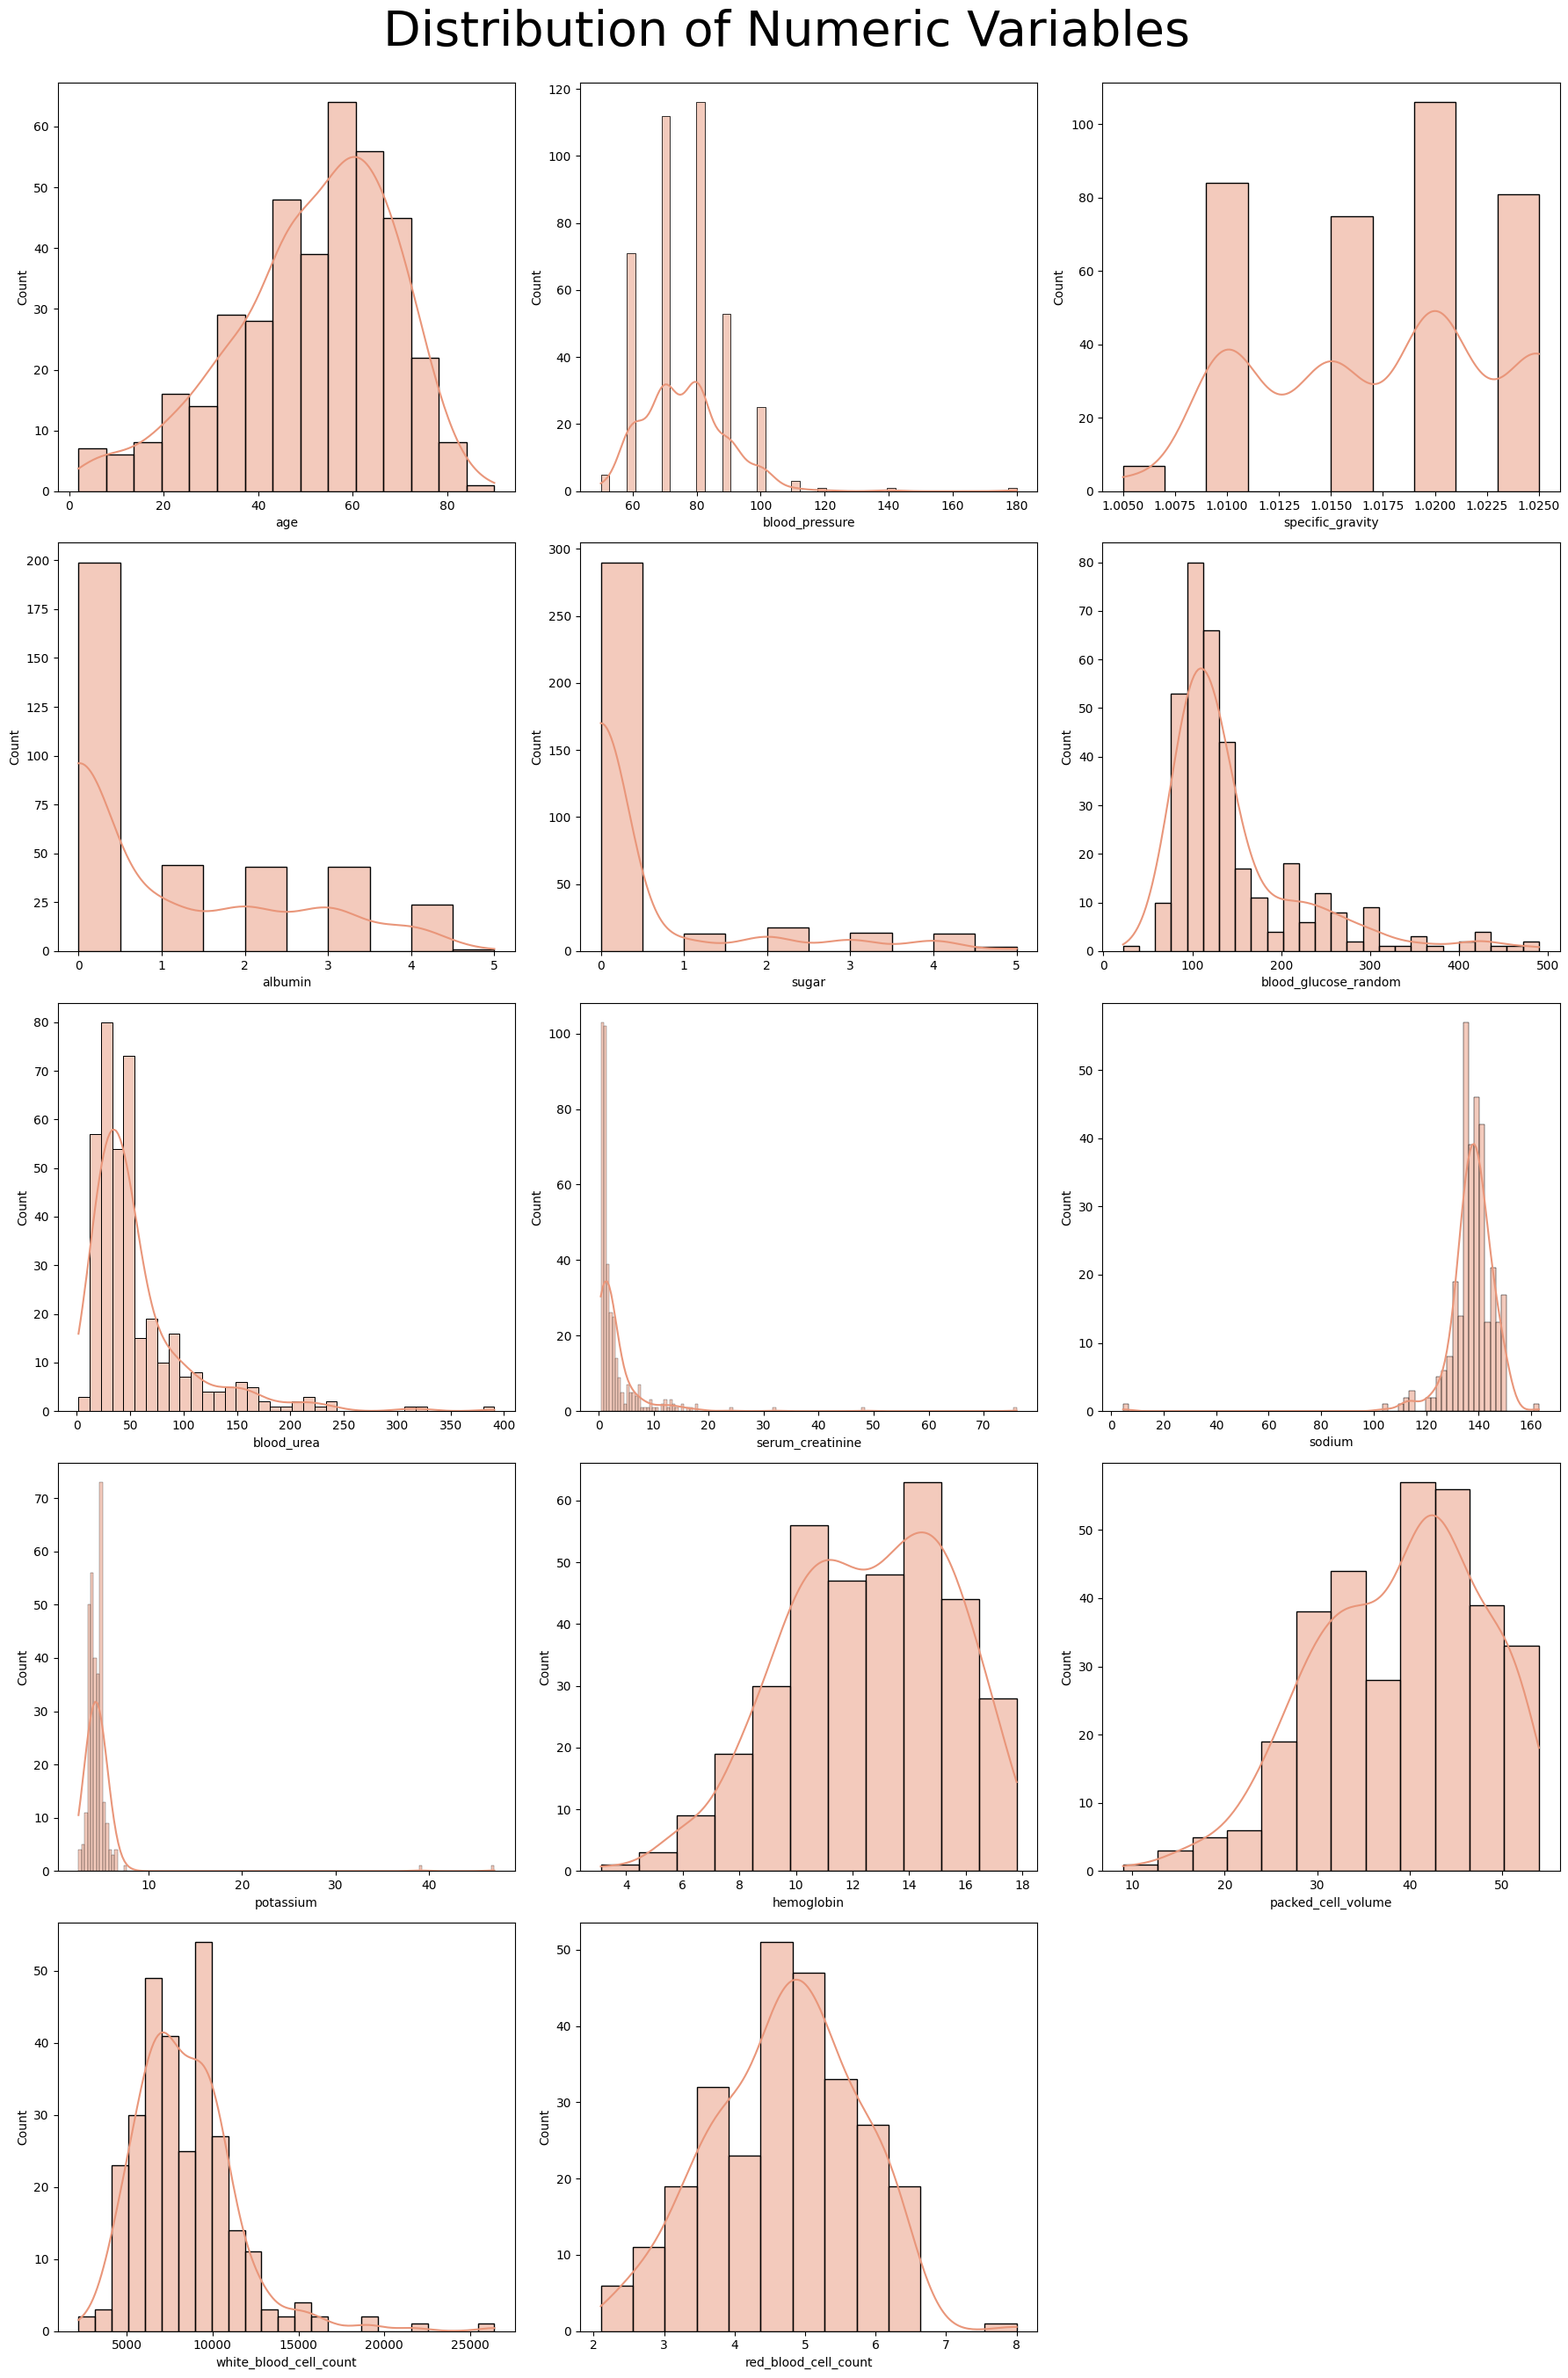

In [19]:
# Distribution of numeric variables
plt.figure(figsize=(18, 27))
plotnumber = 1

for col in num_cols:
    if plotnumber <= len(num_cols):
        ax = plt.subplot(5, 3, plotnumber)
        sns.histplot(x=df[col], kde=True, color='darksalmon')
        plt.xlabel(col)

    plotnumber += 1

plt.suptitle('Distribution of Numeric Variables', fontsize=40, y=1)
plt.tight_layout()
plt.show()

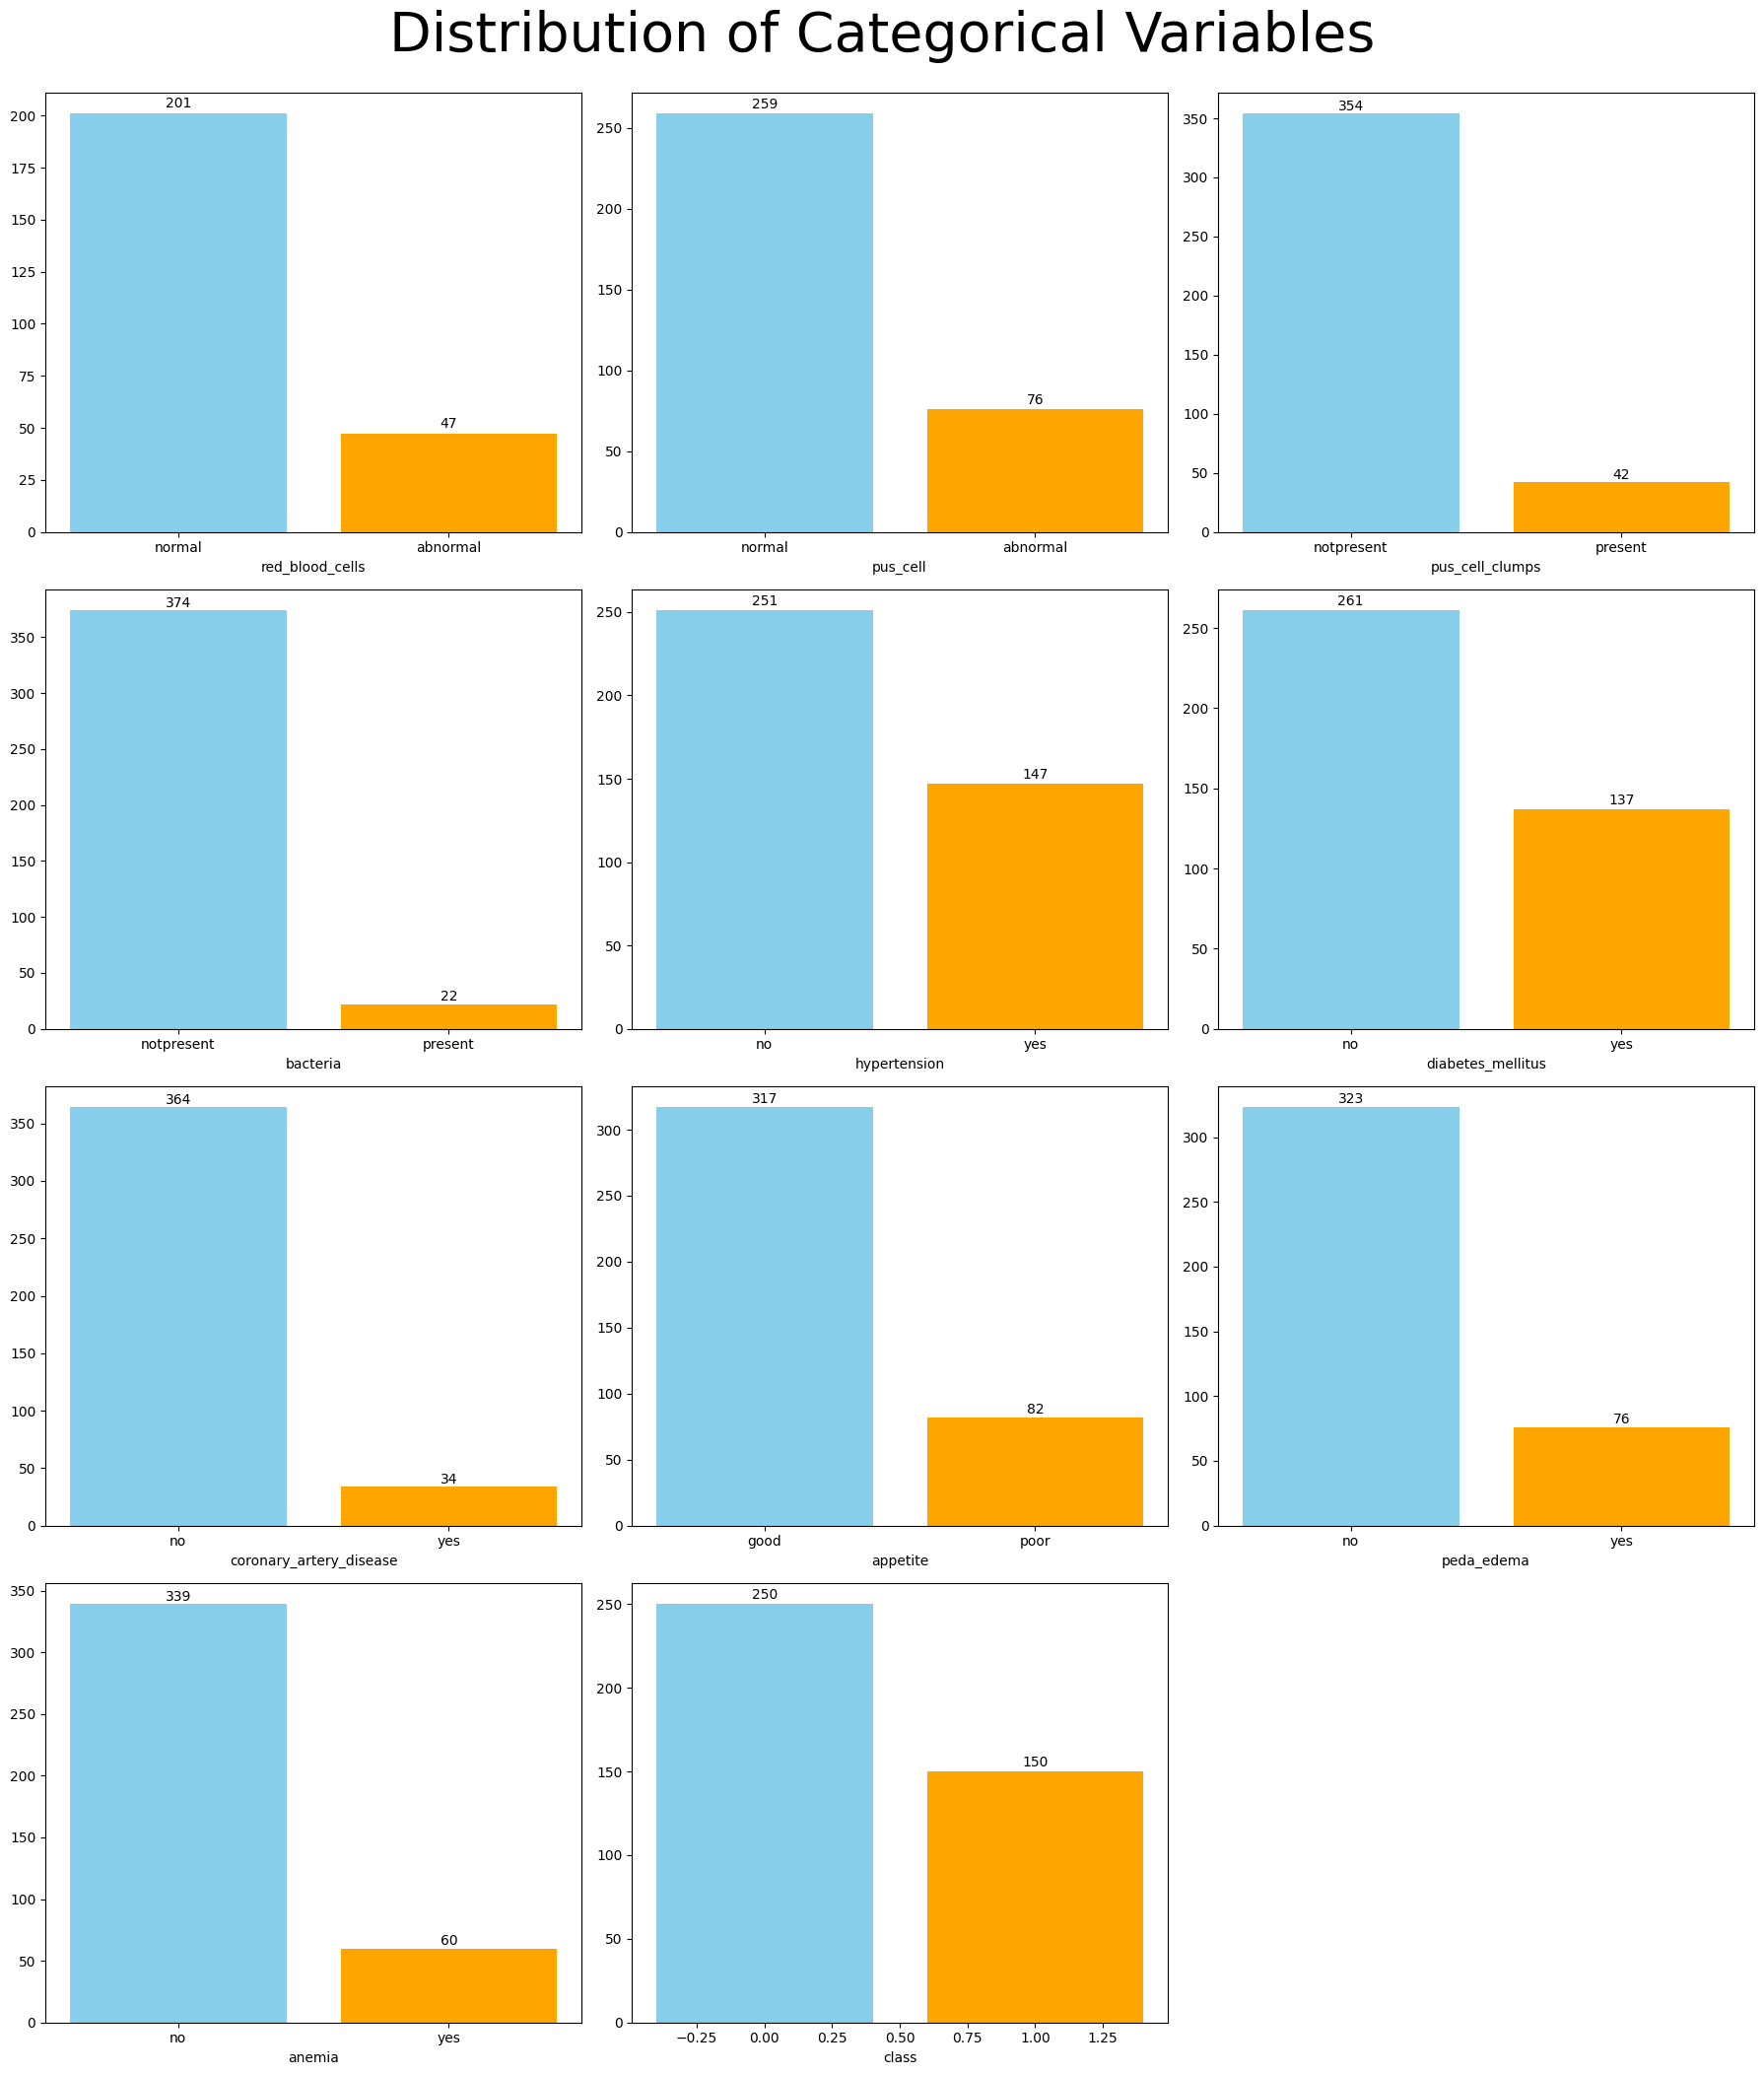

In [20]:
# Distribution of categorical variables
plt.figure(figsize=(18, 21))
plotnumber = 1

colors = ['skyblue', 'orange', 'lightgreen', 'salmon', 'lightcoral', 'cyan', 'pink']

for col in cat_cols:
    if plotnumber <= len(cat_cols):
        ax = plt.subplot(4, 3, plotnumber)
        # sns.countplot(x=df[col], palette = 'pastel')
        counts = df[col].value_counts()
        ax.bar(counts.index, counts.values, color=colors[:len(counts)])

        # Add labels to each bar in the plot
        for p in ax.patches:
            ax.text(p.get_x()+p.get_width()/2, p.get_height()+3, f'{p.get_height()}', ha="center")

        plt.xlabel(col)

    plotnumber += 1

plt.suptitle('Distribution of Categorical Variables', fontsize=40, y=1)
plt.tight_layout()
plt.show()

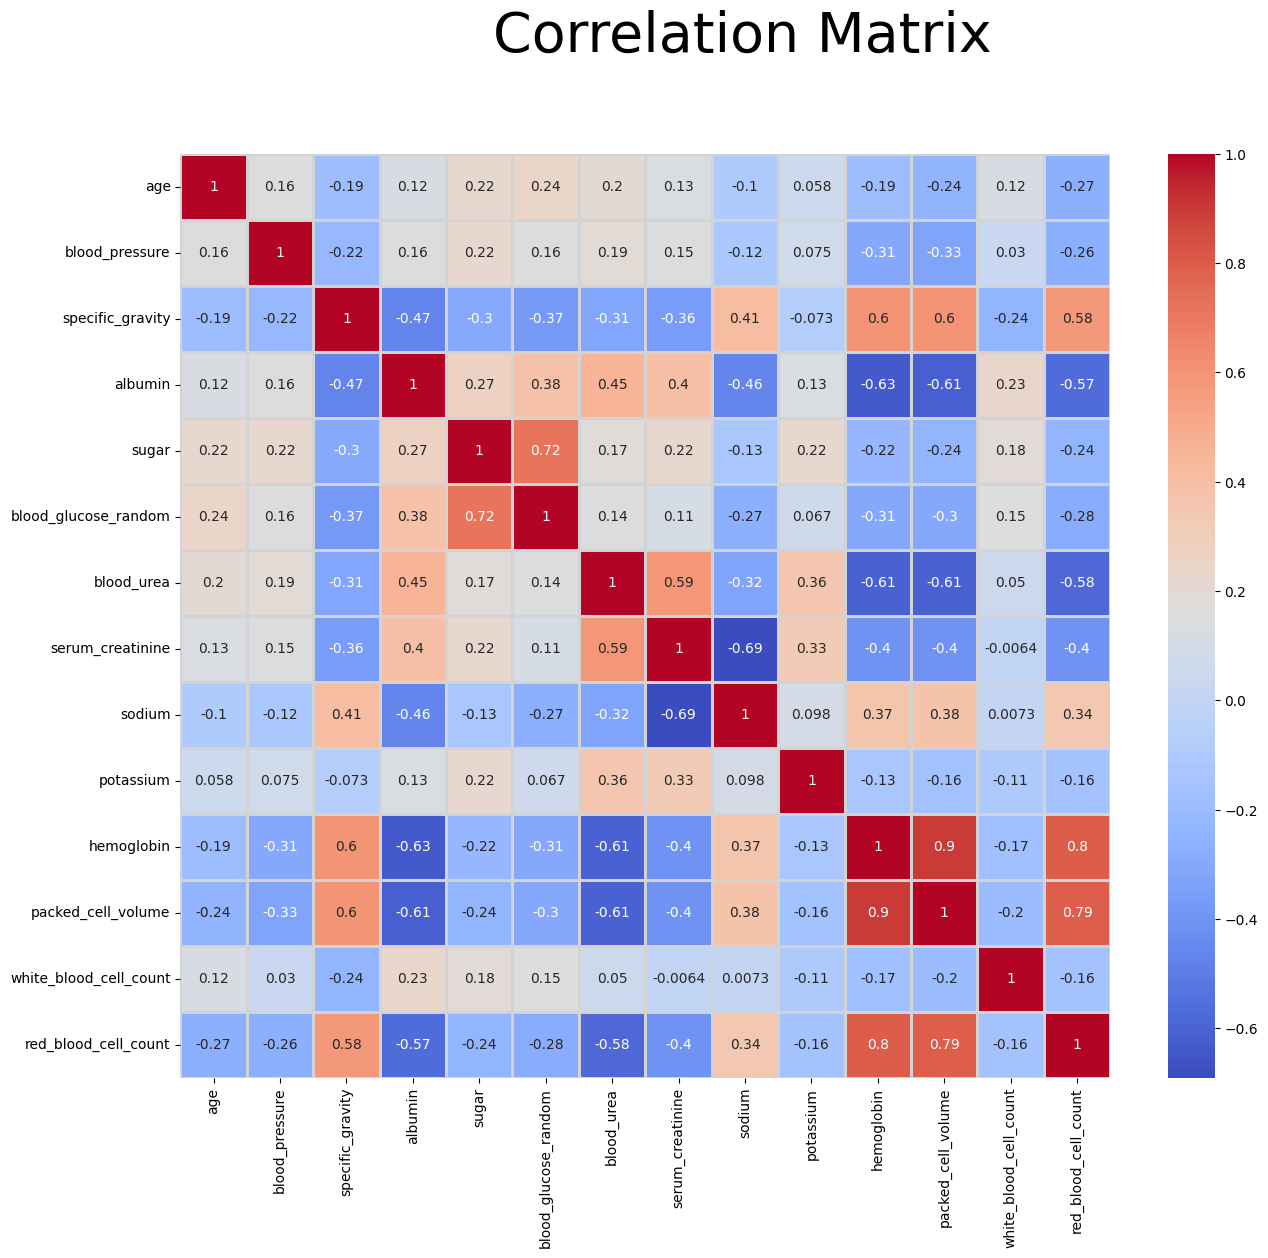

In [21]:
# Correlation matrix  dari kolom numerik

num_df = df[num_cols]

plt.figure(figsize=(15, 12))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', linewidths=2, linecolor='lightgrey')
plt.suptitle('Correlation Matrix', fontsize=40, y=1)
plt.show()

In [22]:
# Menghitung korelasi antar variabel numerik
corr = df.corr(numeric_only=True)

# Melihat korelasi dengan variabel target ('class')
correlation_with_dependent = corr['class']

# Mengurutkan berdasarkan besar korelasi (mutlak)
sorted_correlations = correlation_with_dependent.abs().sort_values(ascending=False)

# Menampilkan korelasi dalam bentuk persen
for attribute in sorted_correlations.index:
    correlation_percent = sorted_correlations[attribute] * 100
    print(f'{attribute} dan variabel terikat = {correlation_percent:.2f}%')


class dan variabel terikat = 100.00%
hemoglobin dan variabel terikat = 76.89%
packed_cell_volume dan variabel terikat = 74.14%
specific_gravity dan variabel terikat = 73.22%
red_blood_cell_count dan variabel terikat = 69.91%
albumin dan variabel terikat = 62.71%
blood_glucose_random dan variabel terikat = 41.97%
blood_urea dan variabel terikat = 38.06%
sodium dan variabel terikat = 37.57%
sugar dan variabel terikat = 34.41%
serum_creatinine dan variabel terikat = 30.00%
blood_pressure dan variabel terikat = 29.41%
white_blood_cell_count dan variabel terikat = 23.19%
age dan variabel terikat = 22.73%
potassium dan variabel terikat = 8.45%


In [23]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'anemia', 'class'],
      dtype='object')

<a id = '3.0'></a>
<p style = "font-size : 40px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Data Pre Processing</strong></p> 

### Missing Values

In [24]:
# checking for null values

df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
hemoglobin                  52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
anemia                       1
class                        0
dtype: int64

In [25]:
# Mengisi missing values pada kolom numerik dengan median
for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].fillna(df[col].median())

# Mengisi missing value pada kolom kategorikal dengan modus (nilai paling sering muncul)
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [26]:
# Cek kembali apakah ada missing values
df.isna().sum().sort_values()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
anemia                     0
class                      0
dtype: int64

<a id = '4.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Feature Encoding</strong></p> 

In [27]:
for col in cat_cols:
    print(f"{col} -> {df[col].unique()}")

red_blood_cells -> ['normal' 'abnormal']
pus_cell -> ['normal' 'abnormal']
pus_cell_clumps -> ['notpresent' 'present']
bacteria -> ['notpresent' 'present']
hypertension -> ['yes' 'no']
diabetes_mellitus -> ['yes' 'no']
coronary_artery_disease -> ['no' 'yes']
appetite -> ['good' 'poor']
peda_edema -> ['no' 'yes']
anemia -> ['no' 'yes']
class -> [0 1]


### Encoding Categorical Data

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [29]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,38.0,6000.0,4.8,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.8,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


<a id = '5.0'></a>
<p style = "font-size : 45px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Model Building</strong></p> 

In [30]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [32]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 42)


<a id = '5.3'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Random Forest Classifier</strong></p>

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'sqrt', 
                                min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)

# Training model
rd_clf.fit(X_train, y_train)

#Predict Model
y_pred_rd = rd_clf.predict(X_test)

In [60]:
print(f"Classification Report :- \n {classification_report(y_test, y_pred_rd)}")

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.93      0.97        30

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80



In [63]:

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, y_pred_rd)

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n {confusion_matrix(y_test, y_pred_rd)}")
print(f"Classification Report :- \n {classification_report(y_test, y_pred_rd)}")

Training Accuracy of Random Forest Classifier is 0.996875
Test Accuracy of Random Forest Classifier is 0.975 

Confusion Matrix :- 
 [[50  0]
 [ 2 28]]
Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.93      0.97        30

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80



In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(f'Akurasi Model: {rd_clf_acc * 100:.2f}%')

rd_prec = precision_score(y_test, y_pred_rd)
print(f'Presisi Model: {rd_prec * 100:.2f}%')

rd_recall = recall_score(y_test, y_pred_rd)
print(f'Recall Model: {rd_recall * 100:.2f}%')

rd_f1 = f1_score(y_test, y_pred_rd)
print(f'F1 Score Model: {rd_f1 * 100:.2f}%')

Akurasi Model: 97.50%
Presisi Model: 100.00%
Recall Model: 93.33%
F1 Score Model: 96.55%


In [36]:
from sklearn.model_selection import cross_val_score

rf_scores = cross_val_score(rd_clf, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", rf_scores)
print("Mean Accuracy:", rf_scores.mean())

Cross-validation scores: [0.9875 1.     0.9625 0.9875 1.    ]
Mean Accuracy: 0.9875


Text(77.92222222222227, 0.5, 'Actual Values')

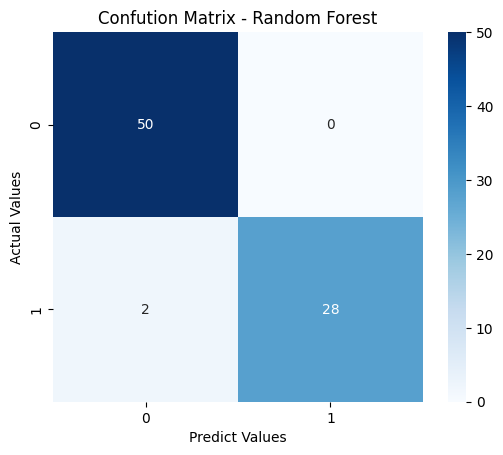

In [67]:
# mengvisualisasikan confuntion Matrix Random Forrest

mat=confusion_matrix(y_test,y_pred_rd)
sns.heatmap(mat,square=True, annot=True, fmt='d',cmap='Blues')
plt.title('Confution Matrix - Random Forest')
plt.xlabel('Predict Values')
plt.ylabel('Actual Values')


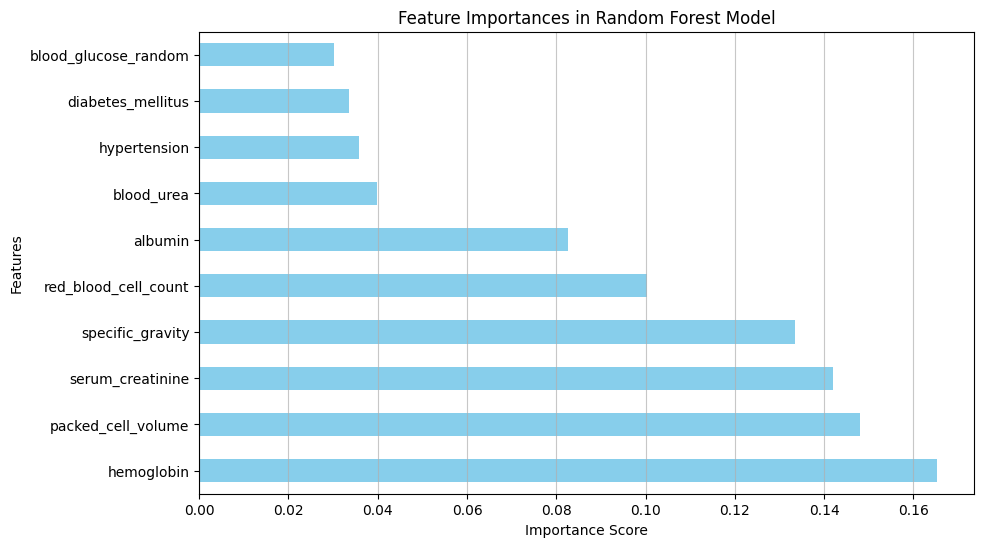

In [38]:
import matplotlib.pyplot as plt

# Feature importance
feat_importances = pd.Series(rd_clf.feature_importances_, index=X.columns)

# Plot top 10 fitur
plt.figure(figsize=(10,6))
feat_importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(axis='x', alpha=0.7)

plt.show()

<a id = '5.7'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>XgBoost</strong></p>

In [39]:
from xgboost import XGBClassifier

# XGBoost Classifier
xgb = XGBClassifier(eval_metric='logloss', objective = 'binary:logistic', learning_rate = 0.1, max_depth = 5, n_estimators = 150, random_state = 42)

# Training model
xgb.fit(X_train, y_train)

# Predict Model
y_pred_xgb = xgb.predict(X_test)

In [40]:
# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, y_pred_xgb)

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Classification Report :- \n {classification_report(y_test, y_pred_xgb)}")

Training Accuracy of XgBoost is 1.0
Test Accuracy of XgBoost is 0.9625 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        50
           1       1.00      0.90      0.95        30

    accuracy                           0.96        80
   macro avg       0.97      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(f'Akurasi Model: {xgb_acc * 100:.2f}%')

xgb_prec = precision_score(y_test, y_pred_xgb)
print(f'Presisi Model: {xgb_prec * 100:.2f}%')

xgb_recall = recall_score(y_test, y_pred_xgb)
print(f'Recall Model: {xgb_recall * 100:.2f}%')

xgb_f1 = f1_score(y_test, y_pred_xgb)
print(f'F1 Score Model: {xgb_f1 * 100:.2f}%')

Akurasi Model: 96.25%
Presisi Model: 100.00%
Recall Model: 90.00%
F1 Score Model: 94.74%


In [42]:
from sklearn.model_selection import cross_val_score

xgb_scores = cross_val_score(xgb, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", xgb_scores)
print("Mean Accuracy:", xgb_scores.mean())

Cross-validation scores: [0.975  1.     0.9625 0.9875 1.    ]
Mean Accuracy: 0.985


Text(113.9222222222222, 0.5, 'Actual Values')

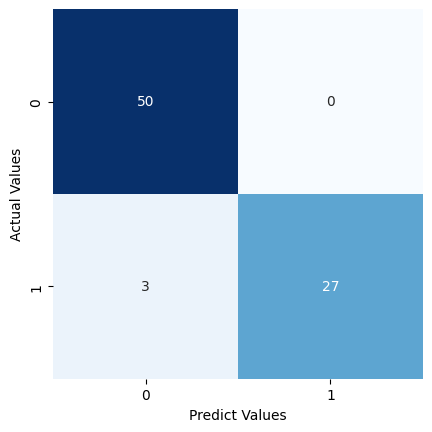

In [68]:
# mengvisualisasikan confuntion Matrix Random Forrest

mat=confusion_matrix(y_test,y_pred_xgb)
sns.heatmap(mat,square=True, annot=True, fmt='d',cmap='Blues',cbar=False)
plt.xlabel('Predict Values')
plt.ylabel('Actual Values')

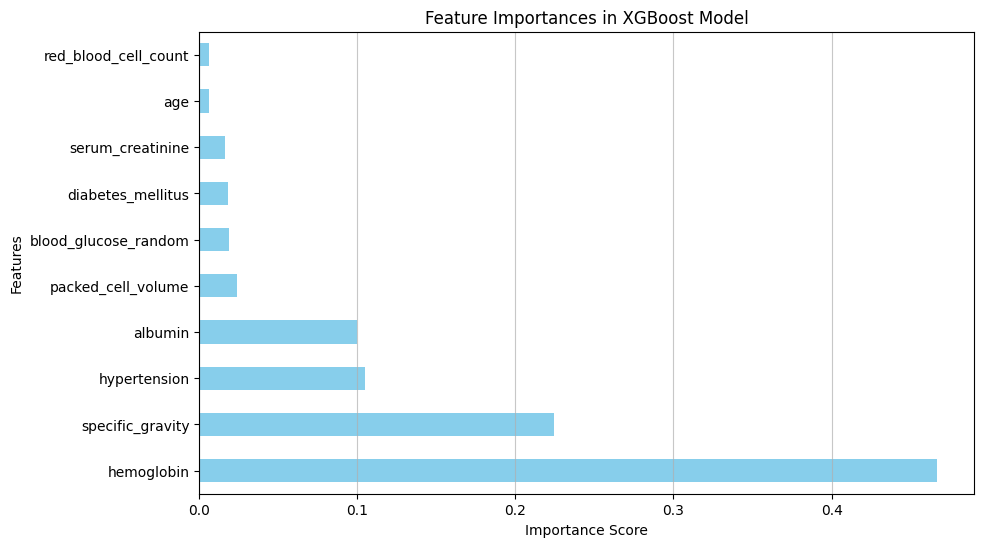

In [44]:
import matplotlib.pyplot as plt

# Feature importance
feat_importances = pd.Series(xgb.feature_importances_, index=X.columns)

# Plot top 10 fitur
plt.figure(figsize=(10,6))
feat_importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title('Feature Importances in XGBoost Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(axis='x', alpha=0.7)

plt.show()

<a id = '5.10'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Logistic Regression</strong></p>

In [46]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model Logistic Regression
logreg = LogisticRegression(solver='liblinear')

# Training model
logreg.fit(X_train, y_train)

# Predict Model
y_pred_logreg = logreg.predict(X_test)

In [47]:
# Hitung akurasi
logreg_acc = accuracy_score(y_test, y_pred_logreg)

# Cetak hasil evaluasi
print(f"Training Accuracy of Logistic Regression is {accuracy_score(y_train, logreg.predict(X_train))}")
print(f"Test Accuracy of Logistic Regression is {logreg_acc} \n")

print(f"Classification Report :- \n {classification_report(y_test, y_pred_logreg)}")


Training Accuracy of Logistic Regression is 0.9875
Test Accuracy of Logistic Regression is 0.95 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        50
           1       0.96      0.90      0.93        30

    accuracy                           0.95        80
   macro avg       0.95      0.94      0.95        80
weighted avg       0.95      0.95      0.95        80



In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(f'Akurasi Model: {logreg_acc * 100:.2f}%')

logreg_prec = precision_score(y_test, y_pred_logreg)
print(f'Presisi Model: {logreg_prec * 100:.2f}%')

logreg_recall = recall_score(y_test, y_pred_logreg)
print(f'Recall Model: {logreg_recall * 100:.2f}%')

logreg_f1 = f1_score(y_test, y_pred_logreg)
print(f'F1 Score Model: {logreg_f1 * 100:.2f}%')

Akurasi Model: 95.00%
Presisi Model: 96.43%
Recall Model: 90.00%
F1 Score Model: 93.10%


In [49]:
from sklearn.model_selection import cross_val_score

logreg_scores = cross_val_score(logreg, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", logreg_scores)
print("Mean Accuracy:", logreg_scores.mean())

Cross-validation scores: [0.975  0.9875 0.9625 1.     0.975 ]
Mean Accuracy: 0.9799999999999999


Text(113.9222222222222, 0.5, 'Actual Values')

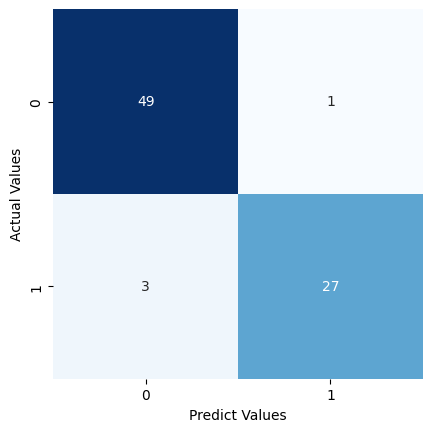

In [69]:
# mengvisualisasikan confuntion Matrix Random Forrest

mat=confusion_matrix(y_test,y_pred_logreg)
sns.heatmap(mat,square=True, annot=True, fmt='d',cmap='Blues',cbar=False)
plt.xlabel('Predict Values')
plt.ylabel('Actual Values')

<a id = '6.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Models Comparison</strong></p> 

In [51]:
# Buat DataFrame perbandingan
models = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Logistic Regression'],
    'Accuracy': [rd_clf_acc, xgb_acc, logreg_acc],
    'Precision': [rd_prec, xgb_prec, logreg_prec],
    'Recall': [rd_recall, xgb_recall, logreg_recall],
    'F1-Score': [rd_f1, xgb_f1, logreg_f1]
})

# Format nilai menjadi persentase
cols = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
models[cols] = models[cols].apply(lambda col: col.map(lambda x: f"{x:.2%}"))

models.sort_values(by = 'Recall', ascending = False)

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,97.50%,100.00%,93.33%,96.55%
1,XGBoost,96.25%,100.00%,90.00%,94.74%
2,Logistic Regression,95.00%,96.43%,90.00%,93.10%


In [52]:
import pickle

# Simpan model ke file .pkl
with open('random_forest.pkl', 'wb') as file:
    pickle.dump(rd_clf, file)

### Modeling Menggunakan 10 Fitur

In [53]:
# Tentukan fitur yang akan digunakan
selected_features = [
    'hemoglobin',
    'packed_cell_volume',
    'specific_gravity',
    'red_blood_cell_count',
    'albumin',
    'blood_glucose_random',
    'blood_urea',
    'sodium',
    'sugar',
    'serum_creatinine'
]

In [54]:
# Pisahkan data menjadi fitur dan target
X_10 = df[selected_features]
y_10 = df['class']

In [55]:
# Buat dan latih model
rf = RandomForestClassifier()
rf.fit(X_10, y_10)
y_pred_rf = rf.predict(X_10)

In [56]:
from sklearn.metrics import precision_score, recall_score, f1_score

rf_acc = accuracy_score(y_10, y_pred_rf)
print(f'Akurasi Model: {rf_acc * 100:.2f}%')

rf_prec = precision_score(y_10, y_pred_rf)
print(f'Presisi Model: {rd_prec * 100:.2f}%')

rf_recall = recall_score(y_10, y_pred_rf)
print(f'Recall Model: {rd_recall * 100:.2f}%')

rf_f1 = f1_score(y_10, y_pred_rf)
print(f'F1 Score Model: {rd_f1 * 100:.2f}%')

Akurasi Model: 100.00%
Presisi Model: 100.00%
Recall Model: 93.33%
F1 Score Model: 96.55%


In [57]:
import pickle

# Simpan model ke file .pkl
with open('random_forest10.pkl', 'wb') as file:
    pickle.dump(rf, file)